In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/Harmonie_wrf_ml/distan_lat42.22lon-8.63p2R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [1]:
import pandas as pd
from scipy.stats import shapiro


station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/Harmonie_wrf_ml/LEVXY2021Y2023.csv",
                          usecols = ["time","spd_o"],
                          parse_dates=["time"]).set_index("time")

#Shapiro test normality
print("Shapiro test normality")
sta, p = shapiro(station.spd_o.sample(500))

print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution speed variable\n")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable no normal distribution speed variable\n")  

station["spd_o"].describe()

Shapiro test normality

p value: 3.222903454276469e-16
Reject null Hypothesis. Alternative hypothesis variable no normal distribution speed variable



count    23123.000000
mean         3.056673
std          1.914485
min          0.000000
25%          1.543332
50%          2.572220
75%          4.115552
max         17.491096
Name: spd_o, dtype: float64

**Forecast D0 harmonie**

In [2]:
#forecast d0
model_h= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/Harmonie_wrf_ml/lat42.22lon-8.63p2R1KmD0_h.csv",parse_dates=["time"]).set_index("time")
model_h

,dir0,snow_prec0,isocero0,mod0,racha_u0,racha_v0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2021-12-01 00:00:00,69.51,0,1966.10,0.16,-0.27,-0.09,100237.00,280.77,0.96,4059.89,...,-14176.54,3240.0,0.07,0.12,0.00,0.18,56205.03,15365.16,255.05,277.22
2021-12-01 01:00:00,139.15,0,2003.55,0.25,-0.24,0.30,100189.50,280.40,0.94,9189.69,...,-0.88,10756.0,0.54,0.99,0.00,1.00,56150.84,15324.68,254.83,276.93
2021-12-01 02:00:00,126.09,0,2161.32,0.79,-0.89,0.71,100138.34,280.94,0.95,7637.18,...,-0.63,15854.0,1.00,1.00,0.02,1.00,56078.43,15267.43,254.60,277.25
2021-12-01 03:00:00,146.36,0,2023.51,1.19,-0.96,1.57,100092.60,281.09,0.97,3359.18,...,-0.61,9198.0,1.00,1.00,0.02,1.00,56038.57,15241.89,254.18,276.96
2021-12-01 04:00:00,161.50,0,1939.89,0.77,-0.34,1.17,100037.55,281.71,0.93,10551.13,...,-0.24,7302.0,1.00,1.00,0.00,1.00,56013.51,15197.96,254.43,276.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-15 19:00:00,305.26,0,1640.09,2.13,2.87,-2.21,98969.20,284.56,0.87,15984.84,...,-12319.16,4359.0,0.00,0.00,0.00,0.00,55919.75,14493.48,257.83,283.26
2023-03-15 20:00:00,308.34,0,1674.70,1.20,1.45,-1.25,98957.14,283.02,0.94,10792.88,...,-13695.14,3242.0,0.86,0.00,0.00,0.86,55875.79,14474.95,257.68,283.32
2023-03-15 21:00:00,323.48,0,1632.16,0.32,0.29,-0.43,98937.27,282.00,0.97,3531.59,...,-14594.07,3242.0,1.00,0.00,0.00,1.00,55839.30,14450.24,258.16,283.05


In [3]:
#concat station model
all_h = pd.concat([station,model_h],axis=1).dropna()
all_h

,spd_o,dir0,snow_prec0,isocero0,mod0,racha_u0,racha_v0,mslp0,temp0,rh0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2021-12-01 00:00:00,2.572220,69.51,0.0,1966.10,0.16,-0.27,-0.09,100237.00,280.77,0.96,...,-14176.54,3240.0,0.07,0.12,0.00,0.18,56205.03,15365.16,255.05,277.22
2021-12-01 01:00:00,3.086664,139.15,0.0,2003.55,0.25,-0.24,0.30,100189.50,280.40,0.94,...,-0.88,10756.0,0.54,0.99,0.00,1.00,56150.84,15324.68,254.83,276.93
2021-12-01 02:00:00,3.086664,126.09,0.0,2161.32,0.79,-0.89,0.71,100138.34,280.94,0.95,...,-0.63,15854.0,1.00,1.00,0.02,1.00,56078.43,15267.43,254.60,277.25
2021-12-01 03:00:00,3.601108,146.36,0.0,2023.51,1.19,-0.96,1.57,100092.60,281.09,0.97,...,-0.61,9198.0,1.00,1.00,0.02,1.00,56038.57,15241.89,254.18,276.96
2021-12-01 04:00:00,3.086664,161.50,0.0,1939.89,0.77,-0.34,1.17,100037.55,281.71,0.93,...,-0.24,7302.0,1.00,1.00,0.00,1.00,56013.51,15197.96,254.43,276.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 19:00:00,3.086664,274.20,0.0,1807.90,1.92,3.35,-0.38,99867.76,285.11,0.77,...,-0.73,10736.0,0.93,0.99,0.00,1.00,56128.31,15035.52,256.50,275.67
2023-03-14 20:00:00,2.572220,286.38,0.0,1908.94,1.50,2.52,-0.85,99901.39,284.96,0.80,...,-0.55,6768.0,0.95,1.00,0.00,1.00,56184.24,15056.29,256.91,275.74
2023-03-14 21:00:00,2.057776,249.59,0.0,1871.24,0.87,1.52,0.50,99906.75,284.80,0.84,...,-0.15,6768.0,0.93,1.00,0.00,1.00,56221.86,15064.11,257.13,275.81


**Observed speed (speed_o) Vs forecasted speed meteorological model point 0 (mod0)- Units (m/s)**

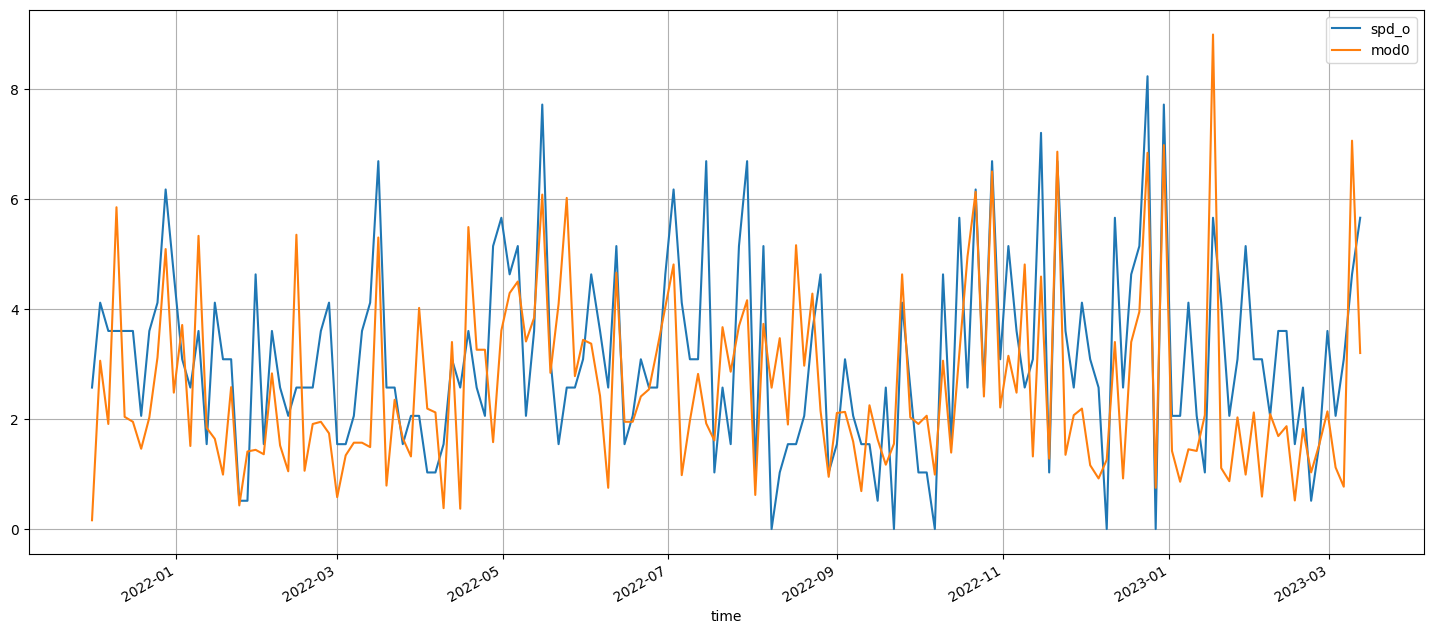

In [4]:
all_h[["spd_o","mod0"]][0::72].plot(figsize=(18, 8),grid =True,);

**Meteorological model point 1 scores**

                 Mean_AE   MSE    R2  Median_AE
results point 1     1.08  2.01  0.44       0.88


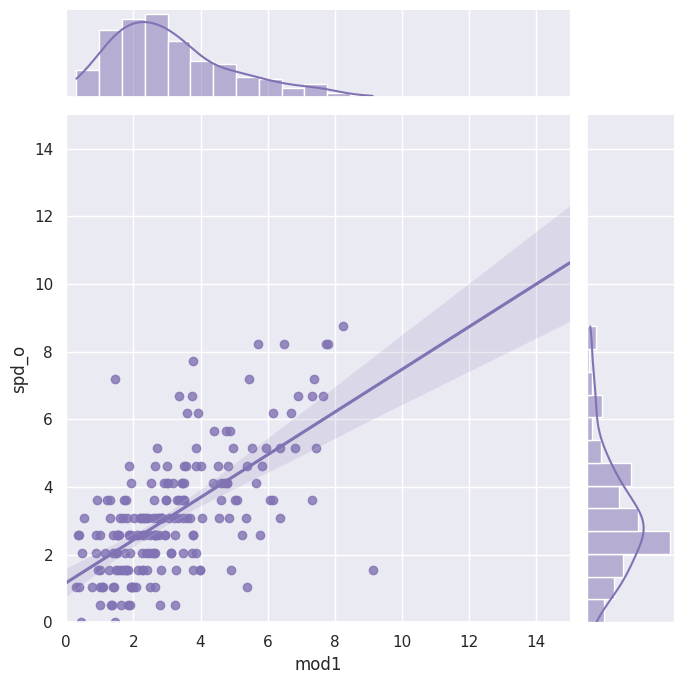

In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
import seaborn as sns
import numpy as np

#Mean absolute error
Mean_AE = round(mean_absolute_error(all_h["spd_o"], all_h["mod1"]),2)
#MSE 
MSE = round(mean_squared_error(all_h["spd_o"], all_h["mod1"]),2)
#R2
R2 = round(r2_score(all_h["spd_o"], all_h["mod1"]),2)
#Median absolute error
Median_AE = round(median_absolute_error(all_h["spd_o"], all_h["mod1"]),2)
#random seed 1
np.random.seed(1)

sns.set_theme(style="darkgrid")
g = sns.jointplot(x="mod1", y="spd_o", data=all_h.sample(200),
                  kind="reg", truncate=False,
                  xlim=(0, 15), ylim=(0, 15),
                  color="m", height=7)


print(pd.DataFrame({"Mean_AE":Mean_AE,"MSE":MSE,"R2":R2,"Median_AE":Median_AE},index=["results point 1"]))

**Meteorological model independent variables X**

In [7]:
all_h.columns

Index(['spd_o', 'dir0', 'snow_prec0', 'isocero0', 'mod0', 'racha_u0',
       'racha_v0', 'mslp0', 'temp0', 'rh0', 'visibility0', 'lhevapac0',
       'lhsublac0', 'lwflx0', 'prec0', 'swflx0', 'shflxac0', 'cape0', 'cin0',
       'cfh0', 'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500',
       'dir1', 'snow_prec1', 'isocero1', 'mod1', 'racha_u1', 'racha_v1',
       'mslp1', 'temp1', 'rh1', 'visibility1', 'lhevapac1', 'lhsublac1',
       'lwflx1', 'prec1', 'swflx1', 'shflxac1', 'cape1', 'cin1', 'cfh1',
       'cfl1', 'cfm1', 'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

# X and Y
Y = all_h.spd_o
X = all_h[['dir0', 'snow_prec0', 'isocero0', 'mod0', 'racha_u0',
       'racha_v0', 'mslp0', 'temp0', 'rh0', 'visibility0', 'lhevapac0',
       'lhsublac0', 'lwflx0', 'prec0', 'swflx0', 'shflxac0', 'cape0', 'cin0',
       'cfh0', 'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500',
       'dir1', 'snow_prec1', 'isocero1', 'mod1', 'racha_u1', 'racha_v1',
       'mslp1', 'temp1', 'rh1', 'visibility1', 'lhevapac1', 'lhsublac1',
       'lwflx1', 'prec1', 'swflx1', 'shflxac1', 'cape1', 'cin1', 'cfh1',
       'cfl1', 'cfm1', 'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501']]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyRegressor(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

In [ ]:
models

**LGBMRegressor. y_test from lazypredict**

In [ ]:
Mean_AE = round(mean_absolute_error(y_test, predictions.LGBMRegressor),2)
MSE = round(mean_squared_error(y_test, predictions.LGBMRegressor),2)
R2 = round(r2_score(y_test, predictions.LGBMRegressor),2)
Median_AE = round(median_absolute_error(y_test, predictions.LGBMRegressor),2)

print(pd.DataFrame({"Mean_AE":Mean_AE,"MSE":MSE,"R2":R2,"Median_AE":Median_AE},index=["results LGBMRegressor"]))

**ExtraTreesRegressor y_test from lazypredict**

In [ ]:
Mean_AE = round(mean_absolute_error(y_test, predictions.ExtraTreesRegressor),2)
MSE = round(mean_squared_error(y_test, predictions.ExtraTreesRegressor),2)
R2 = round(r2_score(y_test, predictions.ExtraTreesRegressor),2)
Median_AE = round(median_absolute_error(y_test, predictions.ExtraTreesRegressor),2)

print(pd.DataFrame({"Mean_AE":Mean_AE,"MSE":MSE,"R2":R2,"Median_AE":Median_AE},index=["results ExtraTreesRegressor"]))

**Add time variables**

In [13]:
all_h["hour"] = all_h.index.hour
all_h["month"] = all_h.index.month
all_h["dayofyear"] = all_h.index.dayofyear
all_h["weekofyear"] = all_h.index.isocalendar().week.astype(int)

In [14]:
all_h.columns

Index(['spd_o', 'dir0', 'snow_prec0', 'isocero0', 'mod0', 'racha_u0',
       'racha_v0', 'mslp0', 'temp0', 'rh0', 'visibility0', 'lhevapac0',
       'lhsublac0', 'lwflx0', 'prec0', 'swflx0', 'shflxac0', 'cape0', 'cin0',
       'cfh0', 'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500',
       'dir1', 'snow_prec1', 'isocero1', 'mod1', 'racha_u1', 'racha_v1',
       'mslp1', 'temp1', 'rh1', 'visibility1', 'lhevapac1', 'lhsublac1',
       'lwflx1', 'prec1', 'swflx1', 'shflxac1', 'cape1', 'cin1', 'cfh1',
       'cfl1', 'cfm1', 'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501', 'hour',
       'month', 'dayofyear', 'weekofyear'],
      dtype='object')

**lgbmregressor**

   Median_AE   Mean_AE   MSE    R2
0       0.67      0.83  1.17  0.67
1       0.68      0.84  1.18  0.69
2       0.67      0.85  1.21  0.67
3       0.63      0.80  1.10  0.71
4       0.65      0.80  1.09  0.68


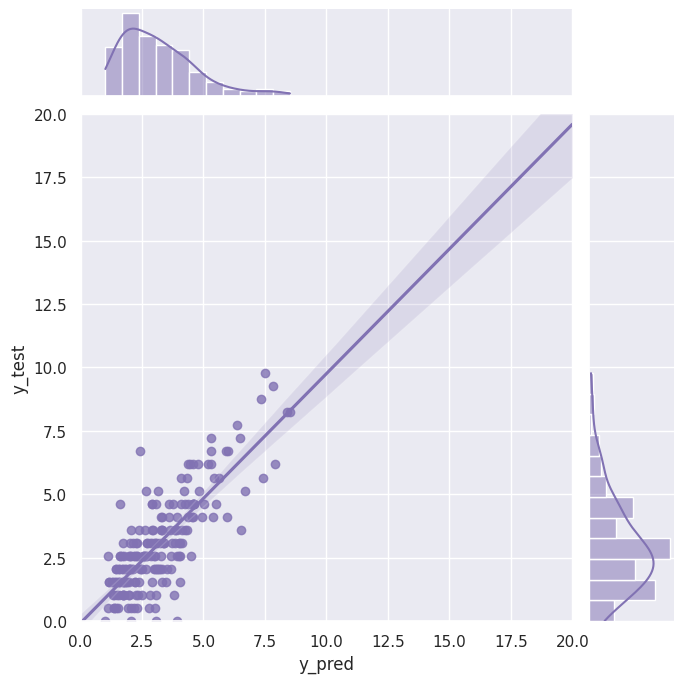

In [16]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

#random seed 1
np.random.seed(1)

# X and Y
Y = all_h.spd_o
X = all_h[['dir0', 'snow_prec0', 'isocero0', 'mod0', 'racha_u0',
       'racha_v0', 'mslp0', 'temp0', 'rh0', 'visibility0', 'lhevapac0',
       'lhsublac0', 'lwflx0', 'prec0', 'swflx0', 'shflxac0', 'cape0', 'cin0',
       'cfh0', 'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500',
       'dir1', 'snow_prec1', 'isocero1', 'mod1', 'racha_u1', 'racha_v1',
       'mslp1', 'temp1', 'rh1', 'visibility1', 'lhevapac1', 'lhsublac1',
       'lwflx1', 'prec1', 'swflx1', 'shflxac1', 'cape1', 'cin1', 'cfh1',
       'cfl1', 'cfm1', 'cft1', 'HGT5001', 'HGT8501', 'T5001', 'T8501', 'hour',
       'month', 'dayofyear', 'weekofyear']]

# loop random
Median_AE_ml = []
Mean_AE_ml =[]
MSE_ml = []
R2_ml = []

#20 samples to test algorithm
for t in range (0,5):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #machine learning model
  ml_model = LGBMRegressor().fit(X_train,y_train)
  #ml_model = RandomForestRegressor().fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  
  #Score calculation
  Mean_AE_ml.append(round(mean_absolute_error(y_test, y_pred),2))
  Median_AE_ml.append(round(median_absolute_error(y_test, y_pred),2))
  MSE_ml.append (round(mean_squared_error(y_test, y_pred),2))
  R2_ml.append(round(r2_score(y_test, y_pred),2))

print(pd.DataFrame({"Median_AE":Median_AE_ml," Mean_AE":Mean_AE_ml,"MSE":MSE_ml,"R2":R2_ml}))  

#show results sample 200
result = pd.DataFrame({"y_pred":y_pred,"y_test":y_test.values})

#random seed 1
np.random.seed(1)

sns.set_theme(style="darkgrid")
g = sns.jointplot(x="y_pred", y="y_test", data=result.sample(200),
                  kind="reg", truncate=False,
                  xlim=(0, 20), ylim=(0, 20),
                  color="m", height=7)

**T test (1sample) compare machine learning mean absolute error in a sample (n=5) versus meteorological model mean absolute error at point 1 (1.08). the alternative hypothesis is: the mean of the underlying distribution of the sample is less than the given population mean (popmean). Significance level (alpha) = 0.01**

In [17]:
from scipy import stats

alpha = 0.01
sta0, p_value1 = stats.ttest_1samp(Median_AE_ml, popmean=1.08, alternative="less")


print("\nalpha: ",alpha)

print("\nMedian Absolute error list from machine learning test:",Median_AE_ml)


print("\n**** Point 1 ****")
print("\np value point 1:",p_value1 )
if p_value1 < alpha:    
    print("\nwe are rejecting null hypothesis  H0: Median Absolute Error machine learning = Median Absolute Error meteorological model point 1")
    print("\nwe are accepting alternative hypothesis: Median Absolute Error machine learning is less than Median Absolute Error meteorological point 1")
else:
    print("\nwe are accepting null hypothesis:  H0  Median Absolute Error machine learning = Median Absolute Error meteorological model point 1") 


alpha:  0.01

Median Absolute error list from machine learning test: [0.67, 0.68, 0.67, 0.63, 0.65]

**** Point 1 ****

p value point 1: 6.151657497115584e-07

we are rejecting null hypothesis  H0: Median Absolute Error machine learning = Median Absolute Error meteorological model point 1

we are accepting alternative hypothesis: Median Absolute Error machine learning is less than Median Absolute Error meteorological point 1


In [18]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")
     

dir0: 1.8%
snow_prec0: 0.0%
isocero0: 1.8%
mod0: 2.5%
racha_u0: 2.1%
racha_v0: 2.9%
mslp0: 1.7%
temp0: 2.2%
rh0: 0.9%
visibility0: 1.6%
lhevapac0: 3.5%
lhsublac0: 2.1%
lwflx0: 1.7%
prec0: 1.6%
swflx0: 1.5%
shflxac0: 3.6%
cape0: 1.5%
cin0: 1.9%
cfh0: 1.0%
cfl0: 0.4%
cfm0: 0.5%
cft0: 0.4%
HGT5000: 2.7%
HGT8500: 2.4%
T5000: 2.8%
T8500: 2.6%
dir1: 3.2%
snow_prec1: 0.0%
isocero1: 1.2%
mod1: 5.2%
racha_u1: 3.4%
racha_v1: 4.3%
mslp1: 1.8%
temp1: 1.9%
rh1: 0.8%
visibility1: 1.1%
lhevapac1: 1.9%
lhsublac1: 0.5%
lwflx1: 2.2%
prec1: 1.6%
swflx1: 1.1%
shflxac1: 3.6%
cape1: 1.8%
cin1: 2.1%
cfh1: 0.9%
cfl1: 0.2%
cfm1: 0.4%
cft1: 0.5%
HGT5001: 1.2%
HGT8501: 0.9%
T5001: 1.3%
T8501: 1.8%
hour: 1.7%
month: 0.4%
dayofyear: 4.6%
weekofyear: 1.0%


**Forecast D0 wfr**

In [20]:
#forecast d0
model_w= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/Harmonie_wrf_ml/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).drop(columns="Unnamed: 0").set_index("time")
model_w

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2021-12-01 01:00:00,166.911270,0.0,1625.594238,0.361933,0.679581,102632.210938,282.382812,0.929759,24061.806641,4.030115,...,0.0,-0.000328,0.3,0.601562,0.000000,0.601562,5646.108887,1533.587524,255.103317,276.895569
2021-12-01 02:00:00,157.827881,0.0,1645.491699,1.773587,2.104271,102598.085938,282.279694,0.880547,24050.435547,15.518686,...,0.0,0.000473,0.2,0.734375,0.000000,0.734375,5642.350586,1530.741821,254.826126,277.271698
2021-12-01 03:00:00,140.719955,0.0,1639.967285,1.348037,1.556662,102591.640625,282.212067,0.889738,24038.398438,11.090862,...,0.0,0.000410,0.0,0.600000,0.000000,0.600000,5639.416016,1529.590820,254.576065,277.138367
2021-12-01 04:00:00,140.801147,0.0,1622.247803,0.883917,1.118278,102608.726562,282.409760,0.905160,24231.185547,6.518489,...,0.0,-0.000141,0.5,0.429233,0.000000,0.500000,5639.175781,1530.439697,254.532379,277.054871
2021-12-01 05:00:00,144.839371,0.0,1638.611938,1.165346,1.494052,102507.921875,282.528992,0.929299,24233.095703,5.641890,...,0.0,-0.000164,0.2,0.517772,0.000000,0.517772,5635.609375,1526.107178,254.994125,277.071564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-15 19:00:00,129.695374,0.0,2334.270752,2.231283,3.630835,101367.210938,284.927490,0.793242,24135.000000,4.315404,...,0.0,-0.000009,0.0,95.000000,70.000000,95.000000,5622.276855,1471.773315,258.207428,282.687744
2023-03-15 20:00:00,129.415817,0.0,2344.966064,1.868026,5.556952,101334.289062,283.514313,0.873175,24135.000000,1.560750,...,0.0,0.000007,0.0,99.000000,55.438789,99.000000,5619.732910,1469.582153,258.180573,282.860260
2023-03-15 21:00:00,172.619675,0.0,2267.495361,3.296074,5.206084,101344.601562,283.654907,0.820962,24135.000000,3.992739,...,0.0,0.000050,0.0,100.000000,81.622391,100.000000,5617.945801,1469.441528,257.984253,282.244385


In [21]:
#concat station model
all_w = pd.concat([station,model_w],axis=1).dropna()
all_w

,spd_o,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2021-12-01 01:00:00,3.086664,166.911270,0.0,1625.594238,0.361933,0.679581,102632.210938,282.382812,0.929759,24061.806641,...,0.000,-0.000328,0.300000,0.601562,0.000000,0.601562,5646.108887,1533.587524,255.103317,276.895569
2021-12-01 02:00:00,3.086664,157.827881,0.0,1645.491699,1.773587,2.104271,102598.085938,282.279694,0.880547,24050.435547,...,0.000,0.000473,0.200000,0.734375,0.000000,0.734375,5642.350586,1530.741821,254.826126,277.271698
2021-12-01 03:00:00,3.601108,140.719955,0.0,1639.967285,1.348037,1.556662,102591.640625,282.212067,0.889738,24038.398438,...,0.000,0.000410,0.000000,0.600000,0.000000,0.600000,5639.416016,1529.590820,254.576065,277.138367
2021-12-01 04:00:00,3.086664,140.801147,0.0,1622.247803,0.883917,1.118278,102608.726562,282.409760,0.905160,24231.185547,...,0.000,-0.000141,0.500000,0.429233,0.000000,0.500000,5639.175781,1530.439697,254.532379,277.054871
2021-12-01 05:00:00,2.572220,144.839371,0.0,1638.611938,1.165346,1.494052,102507.921875,282.528992,0.929299,24233.095703,...,0.000,-0.000164,0.200000,0.517772,0.000000,0.517772,5635.609375,1526.107178,254.994125,277.071564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 19:00:00,3.086664,244.918228,0.0,1737.364868,0.520581,3.198420,102387.101562,283.928497,0.951989,24057.728516,...,13.426,-1.077727,17.919308,96.000000,90.400002,96.000000,5641.943848,1512.545410,256.380249,277.710815
2023-03-14 20:00:00,2.572220,195.800827,0.0,1775.522705,0.776822,3.269660,102352.007812,283.386292,0.974015,24046.126953,...,14.160,-0.000203,28.482769,75.900002,75.900002,75.900002,5646.099121,1512.716431,256.771942,278.039886
2023-03-14 21:00:00,2.057776,232.370193,0.0,1795.778442,1.177359,3.146667,102417.320312,283.298553,0.969332,24233.246094,...,12.804,-0.074594,23.748730,4.800000,3.700000,23.748730,5651.707031,1515.995728,257.180115,277.977325


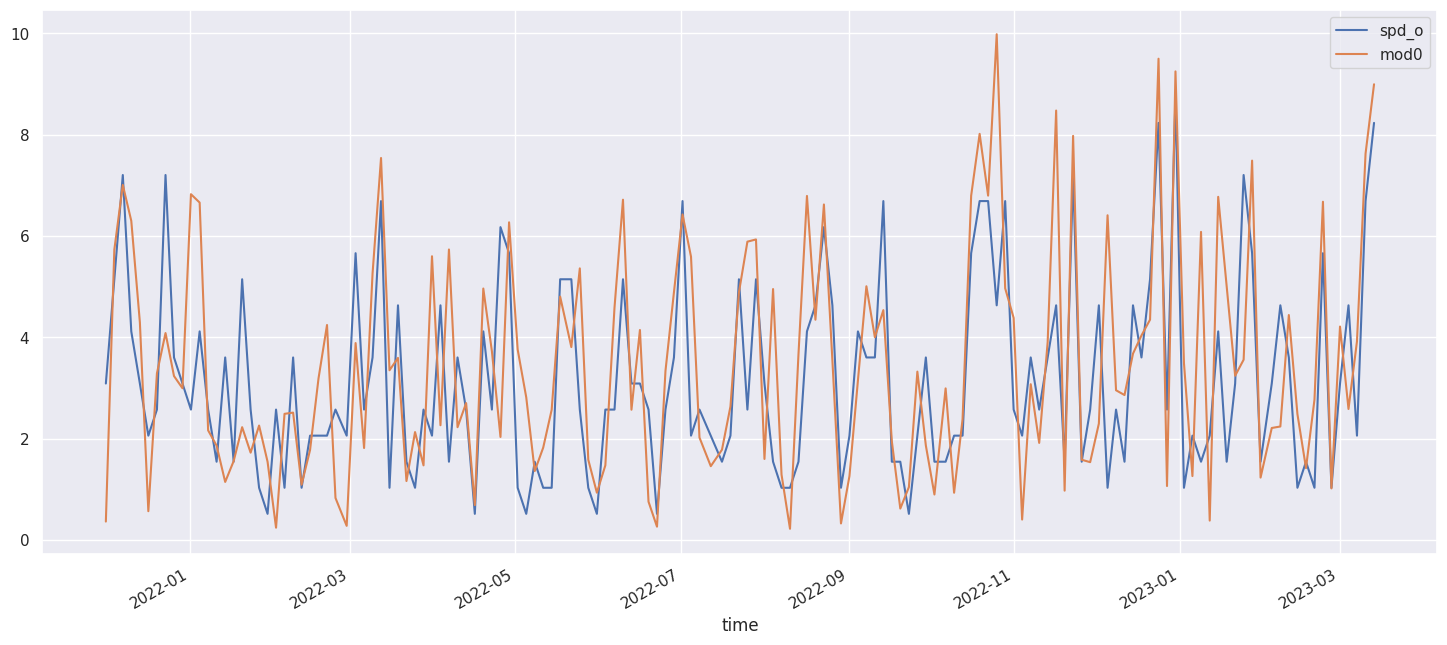

In [28]:
all_w[["spd_o","mod0"]][0::72].plot(figsize=(18, 8),grid =True,);

                 Mean_AE  MSE    R2  Median_AE
results point 1     1.37  3.4  0.06       1.05


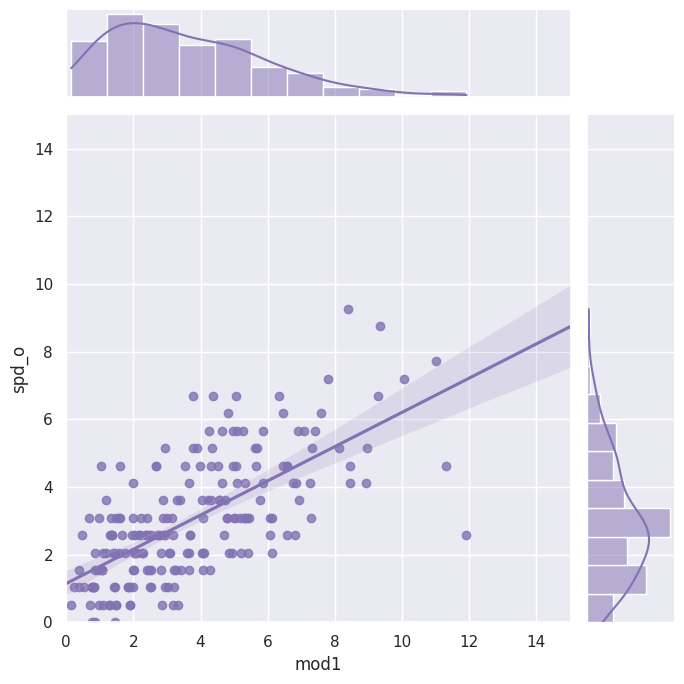

In [22]:
#Mean absolute error
Mean_AE = round(mean_absolute_error(all_w["spd_o"], all_w["mod1"]),2)
#MSE 
MSE = round(mean_squared_error(all_w["spd_o"], all_w["mod1"]),2)
#R2
R2 = round(r2_score(all_w["spd_o"], all_w["mod1"]),2)
#Median absolute error
Median_AE = round(median_absolute_error(all_w["spd_o"], all_w["mod1"]),2)
#random seed 1
np.random.seed(1)

sns.set_theme(style="darkgrid")
g = sns.jointplot(x="mod1", y="spd_o", data=all_w.sample(200),
                  kind="reg", truncate=False,
                  xlim=(0, 15), ylim=(0, 15),
                  color="m", height=7)


print(pd.DataFrame({"Mean_AE":Mean_AE,"MSE":MSE,"R2":R2,"Median_AE":Median_AE},index=["results point 1"]))

In [25]:
all_w["hour"] = all_w.index.hour
all_w["month"] = all_w.index.month
all_w["dayofyear"] = all_w.index.dayofyear
all_w["weekofyear"] = all_w.index.isocalendar().week.astype(int)
all_w.columns

Index(['spd_o', 'dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0',
       'mslp0', 'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0',
       'conv_prec0', 'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0',
       'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1',
       'snow_prec1', 'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1',
       'rh1', 'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1',
       'swflx1', 'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1',
       'HGT5001', 'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')

   Median_AE   Mean_AE   MSE    R2
0       0.72      0.89  1.35  0.64
1       0.73      0.87  1.24  0.65
2       0.72      0.87  1.25  0.66
3       0.73      0.87  1.26  0.66
4       0.71      0.89  1.32  0.63


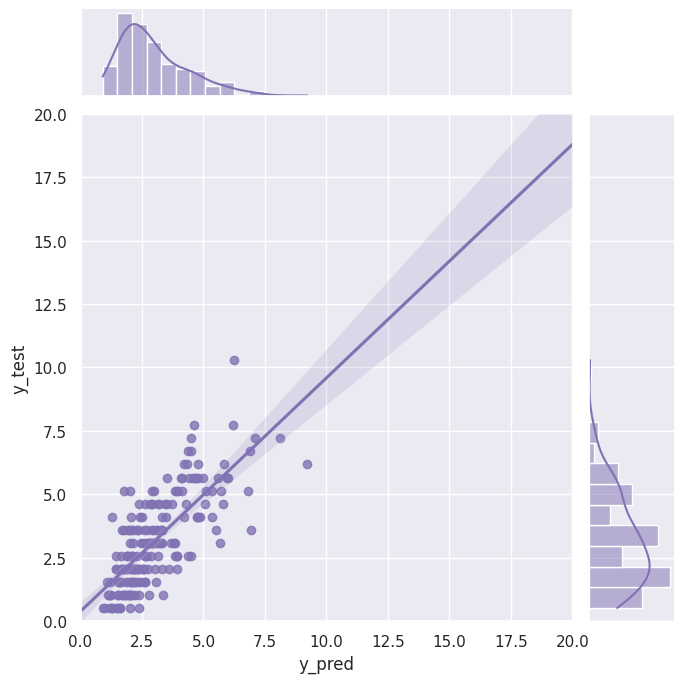

In [26]:
#random seed 1
np.random.seed(1)

# X and Y
Y = all_w.spd_o
X = all_w[['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0',
       'mslp0', 'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0',
       'conv_prec0', 'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0',
       'cfl0', 'cfm0', 'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1',
       'snow_prec1', 'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1',
       'rh1', 'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1',
       'swflx1', 'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1',
       'HGT5001', 'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear']]

# loop random
Median_AE_ml = []
Mean_AE_ml =[]
MSE_ml = []
R2_ml = []

#20 samples to test algorithm
for t in range (0,5):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #machine learning model
  ml_model = LGBMRegressor().fit(X_train,y_train)
  #ml_model = RandomForestRegressor().fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  
  #Score calculation
  Mean_AE_ml.append(round(mean_absolute_error(y_test, y_pred),2))
  Median_AE_ml.append(round(median_absolute_error(y_test, y_pred),2))
  MSE_ml.append (round(mean_squared_error(y_test, y_pred),2))
  R2_ml.append(round(r2_score(y_test, y_pred),2))

print(pd.DataFrame({"Median_AE":Median_AE_ml," Mean_AE":Mean_AE_ml,"MSE":MSE_ml,"R2":R2_ml}))  

#show results sample 200
result = pd.DataFrame({"y_pred":y_pred,"y_test":y_test.values})

#random seed 1
np.random.seed(1)

sns.set_theme(style="darkgrid")
g = sns.jointplot(x="y_pred", y="y_test", data=result.sample(200),
                  kind="reg", truncate=False,
                  xlim=(0, 20), ylim=(0, 20),
                  color="m", height=7)

In [27]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 3.9%
snow_prec0: 0.0%
snowlevel0: 1.9%
mod0: 2.1%
wind_gust0: 2.3%
mslp0: 2.7%
temp0: 2.0%
rh0: 1.1%
visibility0: 1.8%
lhflx0: 2.1%
lwflx0: 2.7%
conv_prec0: 0.0%
prec0: 1.0%
swflx0: 1.2%
shflx0: 2.6%
cape0: 1.3%
cin0: 1.7%
cfh0: 1.0%
cfl0: 1.0%
cfm0: 0.6%
cft0: 0.7%
HGT5000: 2.9%
HGT8500: 2.3%
T5000: 3.0%
T8500: 2.4%
dir1: 5.7%
snow_prec1: 0.0%
snowlevel1: 1.5%
mod1: 4.2%
wind_gust1: 4.2%
mslp1: 1.5%
temp1: 1.8%
rh1: 2.4%
visibility1: 1.8%
lhflx1: 2.2%
lwflx1: 1.7%
conv_prec1: 0.0%
prec1: 1.2%
swflx1: 0.5%
shflx1: 3.4%
cape1: 1.0%
cin1: 1.7%
cfh1: 0.9%
cfl1: 0.8%
cfm1: 0.5%
cft1: 1.1%
HGT5001: 1.0%
HGT8501: 1.4%
T5001: 2.0%
T8501: 1.3%
hour: 4.7%
month: 0.4%
dayofyear: 6.1%
weekofyear: 1.0%
